In [1]:
import math
import time


def timenow():
    return int(time.time() * 1000)

def sqr(x):
    return x*x

def distSquared(p1, p2):
    return sqr(p1[0] - p2[0]) + sqr(p1[1] - p2[1])

class Line(object):
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
        self.lengthSquared = distSquared(self.p1, self.p2)

    def getRatio(self, point):
        segmentLength = self.lengthSquared
        if segmentLength == 0:
            return distSquared(point, p1);
        return ((point[0] - self.p1[0]) * (self.p2[0] - self.p1[0]) + \
        (point[1] - self.p1[1]) * (self.p2[1] - self.p1[1])) / segmentLength

    def distanceToSquared(self, point):
        t = self.getRatio(point)

        if t < 0:
            return distSquared(point, self.p1)
        if t > 1:
            return distSquared(point, self.p2)

        return distSquared(point, [
            self.p1[0] + t * (self.p2[0] - self.p1[0]),
            self.p1[1] + t * (self.p2[1] - self.p1[1])
        ])

    def distanceTo(self, point):
        return math.sqrt(self.distanceToSquared(point))


def simplifyDouglasPeucker(points, pointsToKeep):
    weights = []
    length = len(points)

    def douglasPeucker(start, end):
        if (end > start + 1):
            line = Line(points[start], points[end])
            maxDist = -1
            maxDistIndex = 0

            for i in range(start + 1, end):
                dist = line.distanceToSquared(points[i])
                if dist > maxDist:
                    maxDist = dist
                    maxDistIndex = i

            weights.insert(maxDistIndex, maxDist)

            douglasPeucker(start, maxDistIndex)
            douglasPeucker(maxDistIndex, end)

    douglasPeucker(0, length - 1)
    weights.insert(0, float("inf"))
    weights.append(float("inf"))

    weightsDescending = weights
    weightsDescending = sorted(weightsDescending, reverse=True)

    maxTolerance = weightsDescending[pointsToKeep - 1]
    result = [
        point for i, point in enumerate(points) if weights[i] >= maxTolerance
    ]

    return result

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_pickle("final_data.pkl")

In [4]:
sign1 = data.loc[data["index"] == 0]

In [5]:
sign1

,index,FileName,X,Y,Pressure,Azumith,PenElevation,user,sample,label,...,ratio,dif_pen,dif_az,pen_up,sign_time,x_speed,y_speed,x_size,dist_list,total_length
0,0,0000f00.fpg,"[38.16971713810316, 38.16971713810316, 38.6688...","[72.88776796973518, 72.88776796973518, 69.1046...","[312.0, 369.0, 458.0, 602.0, 685.0, 733.0, 757...","[118.0, 116.0, 116.0, 116.0, 114.0, 114.0, 114...","[65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66....",0000,00,0,...,1.894704,10,28,0,1.01,29.752475,15.70297,101,"[0.0, 3.815891845360075, 5.055101540503492, 11...",760.806104


In [27]:
sign1.Pressure

0    [312.0, 369.0, 458.0, 602.0, 685.0, 733.0, 757...
Name: Pressure, dtype: object

In [18]:
arr = []
for idx, i in enumerate(sign1['X'][0]):
    val = (i, sign1['Y'][0][idx])
    arr.append(val)

In [26]:
sampled_sign = simplifyDouglasPeucker(arr, 100)

In [37]:
print(sampled_sign)

[(38.16971713810316, 72.88776796973518), (38.16971713810316, 72.88776796973518), (38.336106489184694, 64.06052963430012), (37.703826955074874, 52.71122320302648), (36.17304492512479, 39.78562421185372), (34.109816971713805, 25.788146279949558), (32.04658901830283, 14.754098360655737), (30.316139767054906, 7.25094577553594), (29.184692179700498, 2.1437578814627996), (28.38602329450915, 0.0), (27.986688851913478, 0.6305170239596469), (27.820299500831947, 3.1525851197982346), (27.820299500831947, 9.836065573770492), (28.75207986688852, 20.05044136191677), (30.016638935108155, 32.66078184110971), (31.547420965058237, 46.910466582597735), (33.17803660565724, 59.83606557377049), (34.84193011647255, 71.81588902900378), (36.40599001663893, 78.31021437578815), (38.10316139767055, 84.48928121059268), (39.866888519134775, 90.54224464060529), (41.89683860232945, 94.26229508196722), (44.3261231281198, 97.03656998738967), (47.42096505823628, 99.18032786885246), (50.7820299500832, 100.0), (52.4459234

In [41]:
sampled_x = []
for idx, i in enumerate(sampled_sign):
    sampled_x.append(sampled_sign[idx][0])

In [43]:
sampled_y = []
for idx, i in enumerate(sampled_sign):
    sampled_y.append(sampled_sign[idx][1])

In [44]:
sampled_y

[72.88776796973518,
 72.88776796973518,
 64.06052963430012,
 52.71122320302648,
 39.78562421185372,
 25.788146279949558,
 14.754098360655737,
 7.25094577553594,
 2.1437578814627996,
 0.0,
 0.6305170239596469,
 3.1525851197982346,
 9.836065573770492,
 20.05044136191677,
 32.66078184110971,
 46.910466582597735,
 59.83606557377049,
 71.81588902900378,
 78.31021437578815,
 84.48928121059268,
 90.54224464060529,
 94.26229508196722,
 97.03656998738967,
 99.18032786885246,
 100.0,
 98.23455233291298,
 94.76670870113493,
 88.77679697351829,
 80.20176544766709,
 69.86128625472888,
 59.58385876418664,
 52.143757881462804,
 46.53215636822195,
 43.505674653215635,
 41.67717528373266,
 40.605296343001264,
 40.605296343001264,
 43.253467843631775,
 47.28877679697352,
 51.261034047919296,
 55.67465321563682,
 62.10592686002522,
 69.73518284993695,
 75.78814627994956,
 78.87767969735184,
 80.07566204287517,
 83.98486759142497,
 86.88524590163934,
 89.09205548549811,
 91.10970996216898,
 93.06431273644

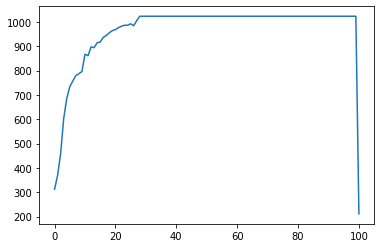

In [28]:
plt.plot(sign1.Pressure[0])

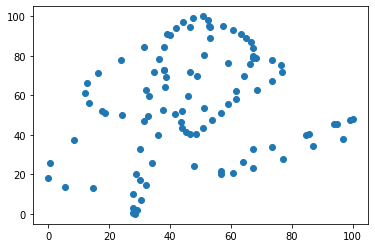

In [47]:
plt.plot(sign1['X'][0], sign1['Y'][0], 'o')

In [49]:
len(sign1['X'][0])

101

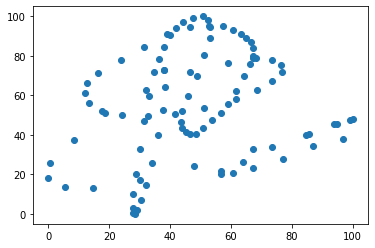

In [48]:
plt.plot(sampled_x, sampled_y, 'o')

In [50]:
len(sampled_x)

100

In [55]:
sign2_x = data.X[2243]

In [56]:
sign2_y = data.Y[2243]

In [57]:
arr = []
for idx, i in enumerate(sign2_x):
    val = (i, sign2_y[idx])
    arr.append(val)

In [59]:
len(arr)

1000

In [60]:
sampled_sign2 = simplifyDouglasPeucker(arr, 100)

In [62]:
len(sampled_sign2)

100

In [67]:
sampled_sign2_x = []
for idx, i in enumerate(sampled_sign2):
    sampled_sign2_x.append(sampled_sign2[idx][0])

In [69]:
sampled_sign2_y = []
for idx, i in enumerate(sampled_sign2):
    sampled_sign2_y.append(sampled_sign2[idx][1])

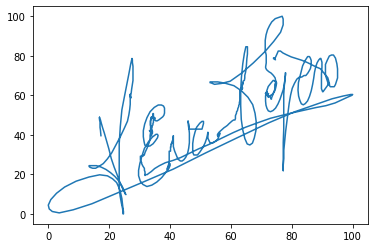

In [71]:
plt.plot(sign2_x, sign2_y)

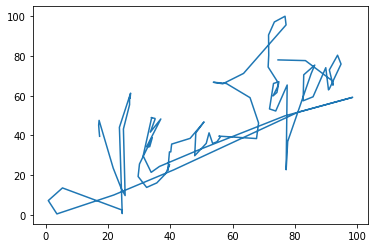

In [72]:
plt.plot(sampled_sign2_x, sampled_sign2_y)

In [73]:
arr1 = []
arr1.append([2468])

In [75]:
arr1.append([10,20,30,40])

In [76]:
arr1

[[2468], [10, 20, 30, 40]]